In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Create base data
data = {
    "Year": np.arange(2025, 2036),
    "Car_Volume_Millions": [10.2, 10.4, 10.6, 10.8, 11.0, 11.3, 11.6, 11.9, 12.1, 12.3, 12.5],
    "Avg_Travel_Time_Min": [39.5, 40.6, 41.6, 42.6, 43.6, 44.7, 45.7, 46.7, 47.7, 48.8, 49.8],
    "Congestion_Index": [75.6, 77.3, 79.0, 79.0, 80.7, 83.0, 85.2, 87.4, 89.7, 91.1, 92.5]
}

df = pd.DataFrame(data)
df

,Year,Car_Volume_Millions,Avg_Travel_Time_Min,Congestion_Index
0,2025,10.2,39.5,75.6
1,2026,10.4,40.6,77.3
2,2027,10.6,41.6,79.0
3,2028,10.8,42.6,79.0
4,2029,11.0,43.6,80.7
5,2030,11.3,44.7,83.0
6,2031,11.6,45.7,85.2
7,2032,11.9,46.7,87.4
8,2033,12.1,47.7,89.7
9,2034,12.3,48.8,91.1


In [3]:
# Step 1: Prepare the model
model = LinearRegression()

# Step 2: Train the model
X = df[["Year"]]
y = df["Car_Volume_Millions"]
model.fit(X, y)

# Step 3: Predict for 2036–2040
future_years = pd.DataFrame({"Year": np.arange(2036, 2041)})
future_car_volume = model.predict(future_years)

# Step 4: Add predictions to the table
future_df = future_years.copy()
future_df["Car_Volume_Millions"] = future_car_volume

# Preview forecast
future_df

,Year,Car_Volume_Millions
0,2036,12.776364
1,2037,13.016364
2,2038,13.256364
3,2039,13.496364
4,2040,13.736364


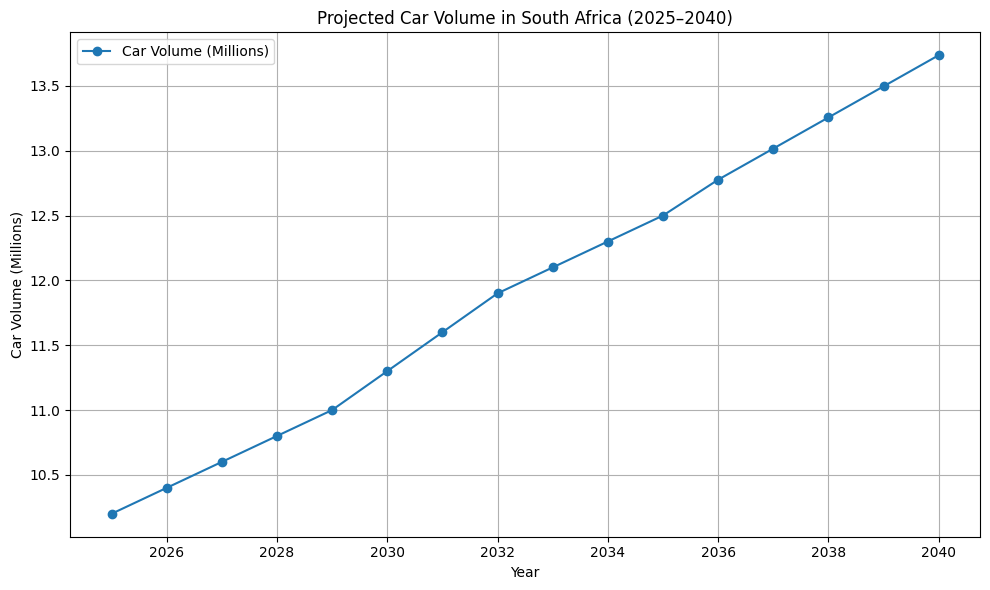

In [4]:
# Combine original and future data
combined_df = pd.concat([df[["Year", "Car_Volume_Millions"]], future_df], ignore_index=True)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_df["Year"], combined_df["Car_Volume_Millions"], marker='o', label="Car Volume (Millions)")
plt.title("Projected Car Volume in South Africa (2025–2040)")
plt.xlabel("Year")
plt.ylabel("Car Volume (Millions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Step 1: Train model using existing data
travel_model = LinearRegression()
X_travel = df[["Car_Volume_Millions"]]
y_travel = df["Avg_Travel_Time_Min"]
travel_model.fit(X_travel, y_travel)

# Step 2: Predict travel time using future car volumes
future_df["Avg_Travel_Time_Min"] = travel_model.predict(future_df[["Car_Volume_Millions"]])

# Preview updated forecast table
future_df

,Year,Car_Volume_Millions,Avg_Travel_Time_Min
0,2036,12.776364,50.792994
1,2037,13.016364,51.814553
2,2038,13.256364,52.836113
3,2039,13.496364,53.857672
4,2040,13.736364,54.879232


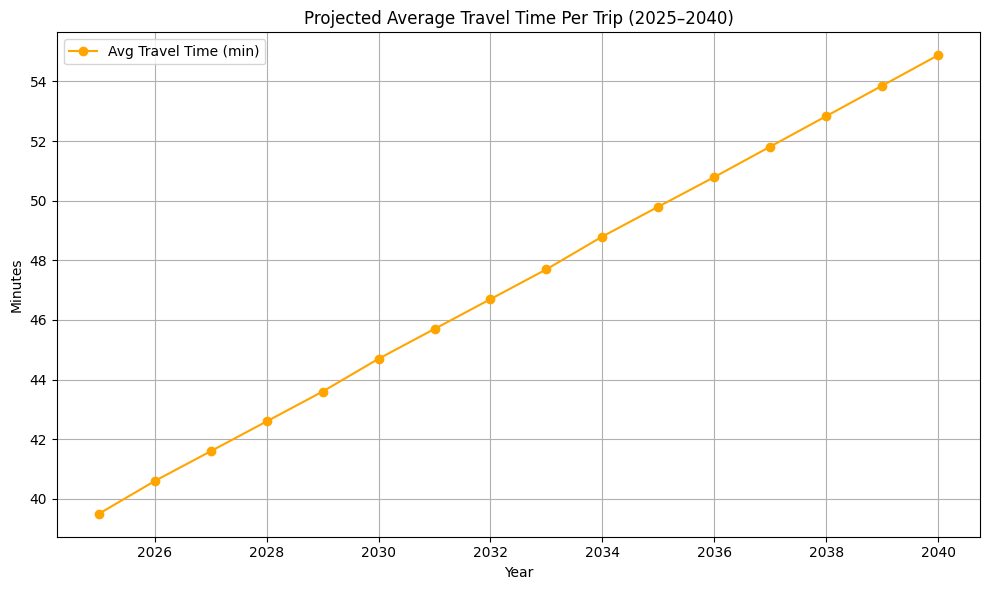

In [6]:
# Combine both datasets for full range
combined_travel_df = pd.concat([
    df[["Year", "Avg_Travel_Time_Min"]],
    future_df[["Year", "Avg_Travel_Time_Min"]]
], ignore_index=True)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_travel_df["Year"], combined_travel_df["Avg_Travel_Time_Min"], marker='o', color='orange', label="Avg Travel Time (min)")
plt.title("Projected Average Travel Time Per Trip (2025–2040)")
plt.xlabel("Year")
plt.ylabel("Minutes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Step 1: Train model using two variables
congestion_model = LinearRegression()
X_cong = df[["Car_Volume_Millions", "Avg_Travel_Time_Min"]]
y_cong = df["Congestion_Index"]
congestion_model.fit(X_cong, y_cong)

# Step 2: Predict using future car volume and travel time
future_df["Congestion_Index"] = congestion_model.predict(
    future_df[["Car_Volume_Millions", "Avg_Travel_Time_Min"]]
)

# Preview complete forecast table
future_df


,Year,Car_Volume_Millions,Avg_Travel_Time_Min,Congestion_Index
0,2036,12.776364,50.792994,94.234415
1,2037,13.016364,51.814553,95.993181
2,2038,13.256364,52.836113,97.751947
3,2039,13.496364,53.857672,99.510713
4,2040,13.736364,54.879232,101.269479


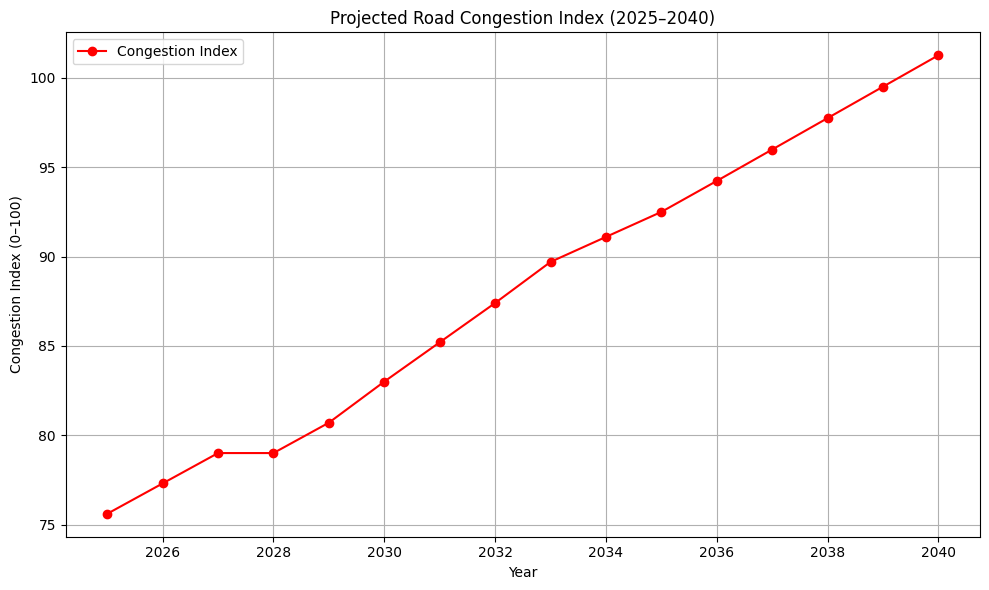

In [8]:
# Combine actual and forecasted congestion data
combined_cong_df = pd.concat([
    df[["Year", "Congestion_Index"]],
    future_df[["Year", "Congestion_Index"]]
], ignore_index=True)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_cong_df["Year"], combined_cong_df["Congestion_Index"], marker='o', color='red', label="Congestion Index")
plt.title("Projected Road Congestion Index (2025–2040)")
plt.xlabel("Year")
plt.ylabel("Congestion Index (0–100)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
